In [1]:
#importing keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Input, SpatialDropout1D
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.
D:\DHRUVIN\Study\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\DHRUVIN\Study\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\DHRUVIN\Study\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\DHRUVIN\Study\Anaconda\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
# DataFrame
import pandas as pd
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
#numpy
import numpy as np
#utility
import re
# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [5]:
#Load Dataset
df = pd.read_csv("./sentiment_data.csv")

In [6]:
vf = pd.read_csv("./Validation_data_competition.csv")

In [7]:
#Load Dataset
tf = pd.read_csv("./testset-competition.csv",)

In [8]:
tokenizer = Tokenizer(num_words=None, split=' ')
tokenizer.fit_on_texts(df['tweet_content'].values)
x = tokenizer.texts_to_sequences(df['tweet_content'].values)
x = pad_sequences(x, maxlen=20, padding='post')
print(x[54])

[   6 4324  367    5   92    8   79    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [9]:
y = tokenizer.texts_to_sequences(vf['tweet_content'].values)
y = pad_sequences(y, maxlen=20, padding='post')
print(y[3])

[225  16 873 310 165 420 281   1   1   4   1 836   1  44   1 923   1   3
   0   0]


In [10]:
from sklearn.model_selection import train_test_split
x_test = df.iloc[:,4:].values
y_test=vf.iloc[:,3:].values

In [11]:
batch_size = 128
epochs = 21

In [12]:
model = Sequential()
model.add(Embedding(14645, 256))
model.add(Dropout(0.3))
model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         3749120   
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                36992     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 3,786,244
Trainable params: 3,786,244
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
history=model.fit(x, x_test,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(y, y_test))


Train on 9087 samples, validate on 2125 samples
Epoch 1/21
9087/9087 [==============================] - 6s 643us/step - loss: 0.4170 - accuracy: 0.8061 - val_loss: 0.2596 - val_accuracy: 0.9285
Epoch 2/21
9087/9087 [==============================] - 5s 571us/step - loss: 0.2046 - accuracy: 0.9407 - val_loss: 0.2012 - val_accuracy: 0.9393
Epoch 3/21
9087/9087 [==============================] - 5s 584us/step - loss: 0.1574 - accuracy: 0.9568 - val_loss: 0.1958 - val_accuracy: 0.9400
Epoch 4/21
9087/9087 [==============================] - 5s 573us/step - loss: 0.1246 - accuracy: 0.9672 - val_loss: 0.2127 - val_accuracy: 0.9328
Epoch 5/21
9087/9087 [==============================] - 5s 562us/step - loss: 0.1016 - accuracy: 0.9745 - val_loss: 0.2405 - val_accuracy: 0.9268
Epoch 6/21
9087/9087 [==============================] - 5s 572us/step - loss: 0.0850 - accuracy: 0.9780 - val_loss: 0.2403 - val_accuracy: 0.9287
Epoch 7/21
9087/9087 [==============================] - 5s 562us/step - los

In [15]:
print(history.history)

{'val_loss': [0.2595773012708215, 0.20118638877307668, 0.19578848570935867, 0.21274821444118724, 0.24052438891635222, 0.24026860303037306, 0.2769815171396031, 0.2941140073046965, 0.3372656821643605, 0.35592328025312986, 0.35978317750201505, 0.374322747482973, 0.39480895141994254, 0.414079900895848, 0.38648342225130866, 0.4052690456755021, 0.4250000539667466, 0.4651813102048986, 0.451425702641992, 0.48630211107871113, 0.44983977603912356], 'val_accuracy': [0.9284706115722656, 0.9392940998077393, 0.9399999976158142, 0.9328235387802124, 0.9268235564231873, 0.9287058711051941, 0.9258823394775391, 0.9200000166893005, 0.919176459312439, 0.908823549747467, 0.9154117703437805, 0.9137647151947021, 0.9094117879867554, 0.9038823246955872, 0.9098823666572571, 0.9052941203117371, 0.9008235335350037, 0.8998823761940002, 0.9002352952957153, 0.9023529291152954, 0.9058823585510254], 'loss': [0.41701206299578303, 0.20457878136865715, 0.15740579471797247, 0.12461097818964632, 0.10164289118987939, 0.08502

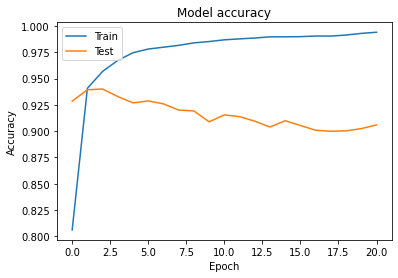

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

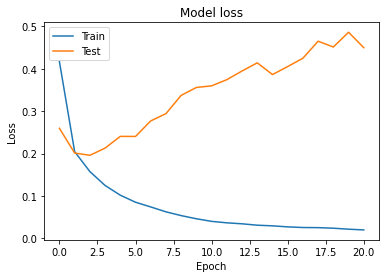

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
score= model.evaluate(y, y_test, verbose = 2)
print("Loss: %.2f" % score[0])
print("Accuracy: %.2f" % score[1])

Loss: 0.45
Accuracy: 0.91


In [19]:
prediction = model.predict(x)

In [20]:
print('Prediction value:', prediction[374])

Prediction value: [0.9706758  0.24985087 0.7189391  0.09435079]


In [21]:
z = tokenizer.texts_to_sequences(tf['tweet_content'].values)
z = pad_sequences(z, maxlen=22, padding='post')

In [22]:
pred=model.predict(z)
print('Prediction value:', pred[420])

Prediction value: [0.02004302 0.00454926 0.00107554 0.00327981]


In [23]:
for i in range(len(pred)):
    tf.at[i,'Harassment']=int(0)
    tf.at[i,'IndirectH']=int(0)
    tf.at[i,'PhysicalH']=int(0)
    tf.at[i,'SexualH']=int(0)
    if pred[i,0]>=0.4:
        tf.at[i,'Harassment']=1
        t=np.argmax(pred[i,1:])
        if t==2:
            tf.at[i,'SexualH']=int(1)
        elif t==1:
            tf.at[i,'PhysicalH']=int(1)
        elif t==0:
            tf.at[i,'IndirectH']=int(1)

In [24]:
tf[420:431]

,tweet_content,Harassment,IndirectH,PhysicalH,SexualH
420,naked girls fingering eachother beautiful girl...,0.0,0.0,0.0,0.0
421,naked girls vigina sexy swedish men pics,1.0,0.0,0.0,1.0
422,naked pillow fights nude girls in the farm,0.0,0.0,0.0,0.0
423,nanuqsaurus was a tyrannosaur from the late cr...,0.0,0.0,0.0,0.0
424,nasa commanded voyager to fire its thrusters f...,0.0,0.0,0.0,0.0
425,nature at its best in troms norway by tommy si...,0.0,0.0,0.0,0.0
426,nawww im the last person to criticize other pp...,0.0,0.0,0.0,0.0
427,nba young boy has a shitty ass personality his...,1.0,1.0,0.0,0.0
428,nba youngboy beat his gf ass blacked her eye a...,1.0,0.0,0.0,1.0
429,need a bitch who know algebra,1.0,0.0,0.0,1.0


In [25]:
model.save('./model.h5')

In [26]:
tf.to_csv('./testset-competition-result.csv')

In [27]:
from keras.utils import plot_model

In [28]:
plot_model(model, to_file='model.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.